# Digital Shift: The Evolution of Products and Platforms in Portuguese E-commerce



### Data Analysis:



In [22]:
sites = ["www.fnac.pt", "www.worten.pt", "www.elcorteingles.pt", "www.radiopopular.pt", "www.staples.pt", "www.pcdiga.com"]

In [1]:
import requests
import urllib.parse
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Categories Analysis:
In this section, we will explore the various product categories available on the e-commerce websites during specific time periods. Analyzing these categories will help us understand the diversity and evolution of product offerings, as well as identify any trends in consumer preferences.


In [2]:
df = pd.read_csv('data/ecommerce_category_analysis_all.csv')
df.head()

,ano,link,site,numero_categorias,lista_categorias,dicionario_subcategorias
0,2007,https://arquivo.pt/wayback/20070611190104mp_/h...,www.worten.pt,7,"['Audiovisual', 'Electrodomesticos', 'Informát...","{'Audiovisual': [], 'Electrodomesticos': [], '..."
1,2010,https://arquivo.pt/wayback/20100803143044mp_/h...,www.worten.pt,7,"['Audiovisuais', 'Electrodomésticos', 'Informá...","{'Audiovisuais': ['TV', 'Blu-ray', 'Home Cinem..."
2,2015,https://arquivo.pt/wayback/20151125065825mp_/h...,www.worten.pt,9,"['Grandes Eletrodomésticos', 'Pequenos Eletrod...",{'Grandes Eletrodomésticos': ['Máquinas de Rou...
3,2020,https://arquivo.pt/wayback/20201231184214mp_/h...,www.worten.pt,15,"['Grandes Eletrodomésticos', 'Pequenos Eletrod...",{'Grandes Eletrodomésticos': ['máquinas de rou...
4,2023,https://arquivo.pt/wayback/20230123170609mp_/h...,www.worten.pt,15,"['Grandes Eletrodomésticos', 'Pequenos Eletrod...","{'Grandes Eletrodomésticos': [], 'Pequenos Ele..."


In [4]:
df['numero_categorias'].value_counts()

numero_categorias
7     5
15    3
3     2
11    2
8     2
12    2
13    2
9     1
6     1
14    1
19    1
21    1
Name: count, dtype: int64

In [5]:
df['site'].value_counts()

site
www.worten.pt          5
www.staples.pt         5
www.radiopopular.pt    5
www.pcdiga.com         4
www.fnac.pt            4
Name: count, dtype: int64

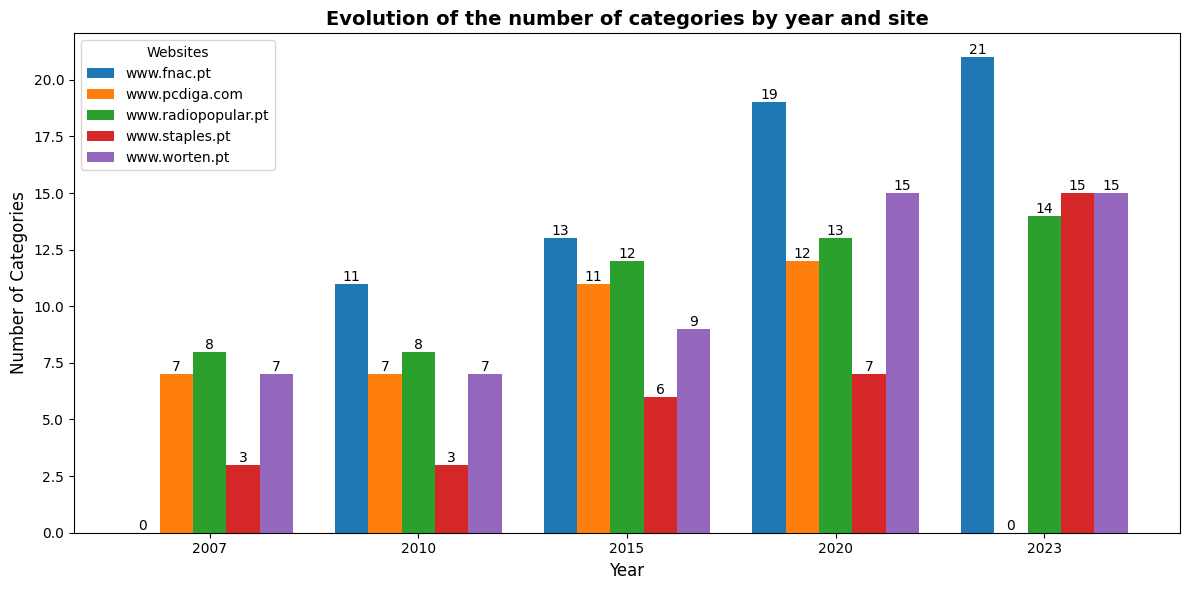

In [6]:
pivot_df = df.pivot_table(index='ano', columns='site', values='numero_categorias')
ax = pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8, title='Evolution of the number of categories by year and site', fontsize=10)

ax.set_ylabel('Number of Categories', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.legend(title='Websites', fontsize=10)
ax.set_title('Evolution of the number of categories by year and site', fontsize=14, fontweight='bold')

plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() 
plt.show()


## Promotional Analysis:
In this section, we will conduct a thorough analysis of the promotional activities featured on various e-commerce websites during specific periods. Understanding how promotions are structured and presented can provide valuable insights into marketing strategies and consumer behavior.

Before diving into the detailed analysis, let's first examine the summary data regarding the promotions that have been identified on these platforms. This summary will serve as a foundation for understanding trends, comparing promotional effectiveness across different retailers, and evaluating the impact of these promotions on consumer purchasing decisions.


In [20]:
df = pd.read_csv('data/black_friday_summary.csv')
df.head()

,date,type,site,number
0,2006-2009,black_friday,www.fnac.pt,1
1,2006-2009,cyber_monday,www.fnac.pt,0
2,2010-2013,black_friday,www.fnac.pt,1
3,2010-2013,cyber_monday,www.fnac.pt,0
4,2014-2015,black_friday,www.fnac.pt,1


In [21]:
total_by_type = df.groupby('type')['number'].sum().reset_index()
print(total_by_type)


           type  number
0  black_friday  127202
1  cyber_monday   91181


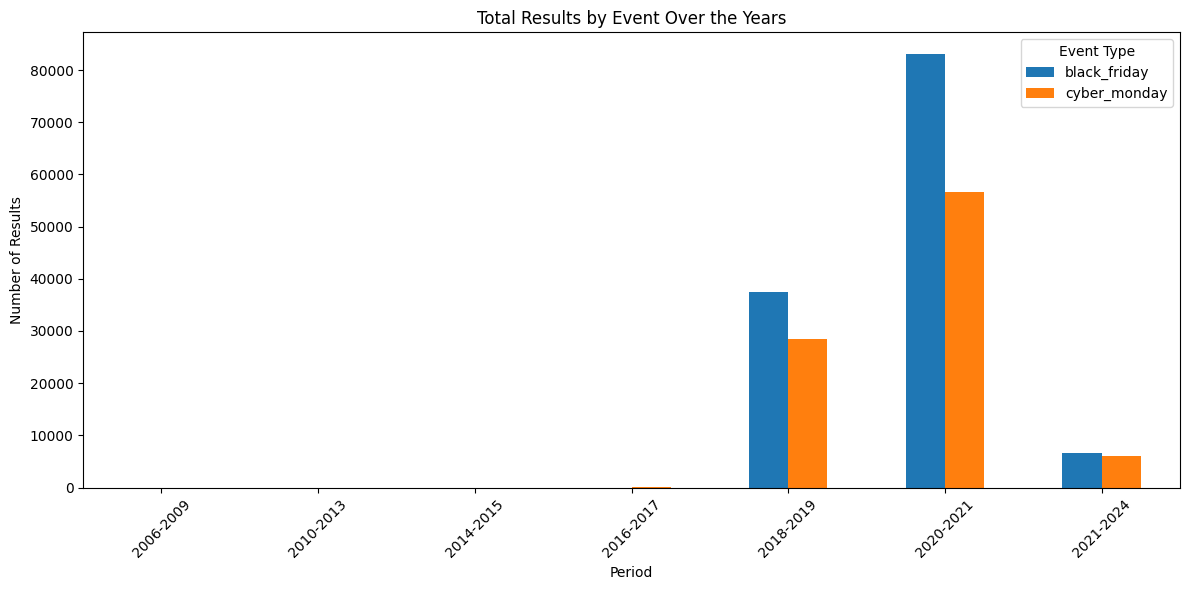

In [22]:
df_grouped = df.groupby(['date', 'type'], as_index=False).sum()

pivot_df = df_grouped.pivot(index='date', columns='type', values='number').fillna(0)

pivot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Total Results by Event Over the Years')
plt.ylabel('Number of Results')
plt.xlabel('Period')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()